In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
X = diabetes.data[['bmi', 'bp']]
y = diabetes.target

In [3]:
y = (y > 140).astype(int) #when the target>140, then it is classified as diabetes (category 1)

n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X.iloc[order].values
y = y[order].astype(float)

X_train = X[: int(0.8 * n_sample)]
y_train = y[: int(0.8 * n_sample)]
X_test = X[int(0.8 * n_sample) :]
y_test = y[int(0.8 * n_sample) :]

In [4]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78        47
         1.0       0.78      0.67      0.72        42

    accuracy                           0.75        89
   macro avg       0.76      0.75      0.75        89
weighted avg       0.76      0.75      0.75        89

Confusion Matrix:
[[39  8]
 [14 28]]


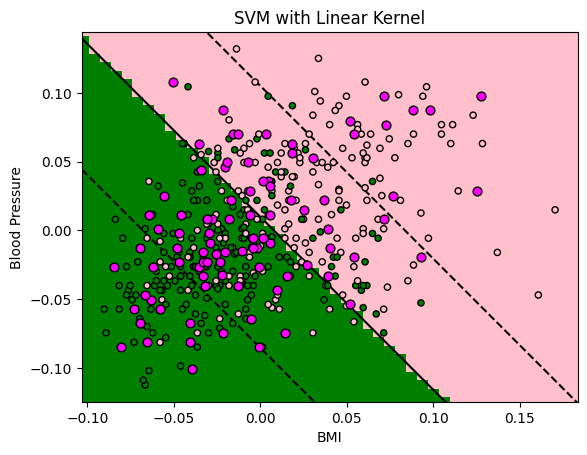

In [6]:
custom_cmap = ListedColormap(['green', 'pink'])
plt.figure()
plt.clf()
plt.scatter(
    X[:, 0], X[:, 1], c=y, zorder=10, cmap=custom_cmap, edgecolor="k", s=20
)

plt.scatter( #test data
    X_test[:, 0], X_test[:, 1], s=40, facecolors="magenta", zorder=10, edgecolor="k"
)

plt.axis("tight")
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm_clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

#color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=custom_cmap, shading='auto')
plt.contour(
    XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-0.5, 0, 0.5]
)

plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('SVM with Linear Kernel')
plt.show()